# 01. Linear Regression

## 1. Linear Regression
* 공부시간에 따른 시험 점수

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
X = dataset.iloc[:,:-1].values # iloc[row,column] [:,-1] 처음부터 마지막 직전까지의 열
Y = dataset.iloc[:,-1].values # 마지막 column data
X,Y

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/inputtransformer2.py:604: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  tokens_by_line = make_tokens_by_line(lines)


(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression() # 객체생성
reg.fit(X,Y) # 학습 모델생성

LinearRegression()

In [7]:
y_pred = reg.predict(X) # x에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

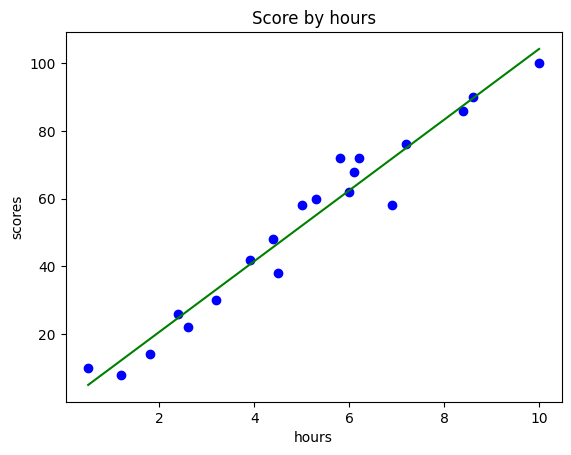

In [8]:
plt.scatter(X,Y, color='b')
plt.plot(X,y_pred, color='g')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [12]:
print("9시간, 8시간 공부했을때의 점수는", reg.predict([[9],[8]]))

9시간, 8시간 공부했을때의 점수는 [93.77478776 83.33109082]


In [13]:
reg.coef_ #기울기 m

array([10.44369694])

In [14]:
reg.intercept_ # y 절편

-0.218484702867201

y = mx + b -> y = 10.443*x + -0.218

## 데이터 set 분리

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [17]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [21]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [22]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [23]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [24]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

### 분리된 데이터를 통한 모델링

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [27]:
reg.fit(X_train, y_train) # 훈련세트로 학습

LinearRegression()

#### 데이터 시각화

In [29]:
import matplotlib.pyplot as plt

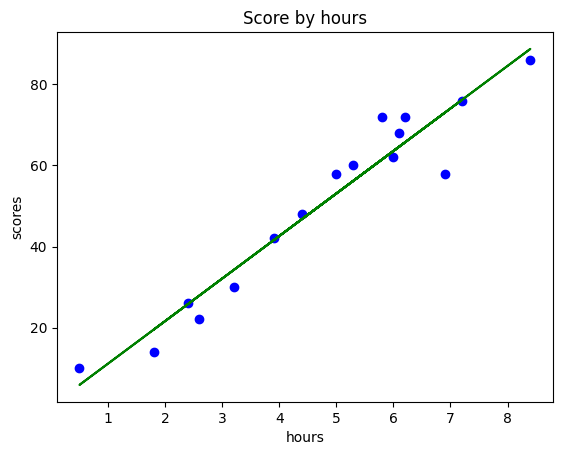

In [34]:
plt.scatter(X_train,y_train, color='b')
plt.plot(X_train,reg.predict(X_train), color='g')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

#### 데이터 시각화 테스트 세트

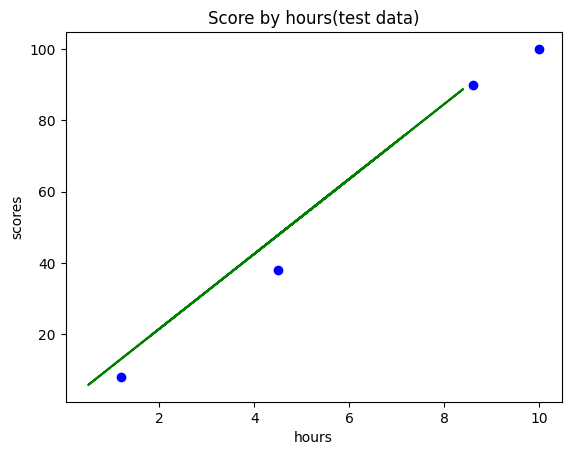

In [35]:
plt.scatter(X_test,y_test, color='b')
plt.plot(X_train,reg.predict(X_train), color='g')
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [36]:
reg.coef_

array([10.49161294])

In [37]:
reg.intercept_

0.6115562905169369

#### 모델평가

In [38]:
reg.score(X_test,y_test) # 0 - 1

0.9727616474310156

In [39]:
reg.score(X_train,y_train)

0.9356663661221668